# DATA ANALYSIS

## Exploratory analysis of train and weather datasets

### Imports

In [1]:
import pandas as pd
import numpy as np

import requests
from datetime import datetime
from meteostat import Hourly, Point

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

### Train dataset

In [145]:
df0 = pd.read_csv('../raw_data/select_2020.csv', encoding= 'unicode_escape', sep=';')
df1 = pd.read_csv('../raw_data/select_2021.csv', encoding= 'unicode_escape', sep=';')
df2 = pd.read_csv('../raw_data/select_2022.csv', encoding= 'unicode_escape', sep=';')
df = pd.concat([df0, df1, df2], ignore_index=True)
df

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0
1,EC 6,2019-12-15,Basel SBB,9999,0,1426,0
2,EC 6,2019-12-15,Bonn Hbf,1844,0,1845,0
3,EC 6,2019-12-15,Bremen Hbf,2217,2,2219,2
4,EC 6,2019-12-15,Duisburg Hbf,1945,6,1946,6
...,...,...,...,...,...,...,...
1322923,NJ 421,2022-05-15,Nürnberg Hbf,336,0,435,29
1322924,NJ 421,2022-05-15,Rosenheim,803,49,805,49
1322925,NJ 421,2022-05-15,Utrecht Centraal,1958,1,2003,0
1322926,NJ 421,2022-05-15,Wörgl Hbf,837,-1,839,-1


In [65]:
df.nunique()

zugnr       156
datum       884
bhf         134
arrTime    1441
adelay      344
depTime    1441
ddelay      366
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322928 entries, 0 to 1322927
Data columns (total 7 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   zugnr    1322928 non-null  object
 1   datum    1322928 non-null  object
 2   bhf      1322928 non-null  object
 3   arrTime  1322928 non-null  int64 
 4   adelay   1322928 non-null  int64 
 5   depTime  1322928 non-null  int64 
 6   ddelay   1322928 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 70.7+ MB


In [68]:
ec6 = df[(df['zugnr'] == 'EC 6') & (df['bhf'] == 'Basel Bad Bf')]
ec6.shape

(807, 7)

In [69]:
ec6

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0
21,EC 6,2019-12-16,Basel Bad Bf,1433,1,1435,1
41,EC 6,2019-12-17,Basel Bad Bf,1433,2,1435,2
61,EC 6,2019-12-18,Basel Bad Bf,1433,2,1435,2
89,EC 6,2019-12-19,Basel Bad Bf,1433,0,1435,0
...,...,...,...,...,...,...,...
1037263,EC 6,2022-05-11,Basel Bad Bf,1433,3,1435,16
1037290,EC 6,2022-05-12,Basel Bad Bf,1433,2,1435,1
1037317,EC 6,2022-05-13,Basel Bad Bf,1433,6,1435,8
1037344,EC 6,2022-05-14,Basel Bad Bf,1433,6,1435,7


In [70]:
ec6 = df[(df['zugnr'] == 'EC 6') & (df['bhf'] == 'Basel Bad Bf') & (df['arrTime'] == 9999)]
ec6.shape

(2, 7)

In [71]:
ec6

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
6630,EC 6,2020-11-28,Basel Bad Bf,9999,0,1435,0
6643,EC 6,2020-11-29,Basel Bad Bf,9999,0,1435,3


### Weather APIs and datasets TESTS

In [22]:
key = '7DYDYYY5GVYHQA52HXFQV5A5Y'
# lat = 38.9697 # Länge
# lon = -77.385 # Breite

# Example in Hamburg Elbbrücken
lat, lon = 53.53450, 10.02450

# Forecasting of 15 days URL
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + str(lat) + "," + str(lon) + "?key=" + key

# Historical data
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + str(lat) + "," + str(lon) + "/2020-10-01/2020-12-31?key=" + key

response = requests.get(url).json()
print(response)

JSONDecodeError: [Errno Expecting value] This query size (2208)  exceeds the maximum query cost for your account (1000). Please split your query into smaller queries. To increase your per query limit, you can add a credit card or subscribe to a monthly plan. : 0

In [26]:
key = '7DYDYYY5GVYHQA52HXFQV5A5Y'
# lat = 38.9697 # Länge
# lon = -77.385 # Breite

# TODO: Append to the database, the information of latitude and longitud of every station from the shp file

# Example in Hamburg Elbbrücken
lat, lon = 53.53450, 10.02450

# Forecasting of 15 days URL
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + str(lat) + "," + str(lon) + "?key=" + key

start_date = '2020-10-01'
end_date = '2020-10-02'

# TODO: Build for loop to get daily data since the maximum quota for every query is reached
# TODO: Will I be blocked for making 365 * 2 requests in a row?
# TODO: The limit of queries' cost is 1000 per day. I already did 7 queries for a cost of 148.
#       That means that each query costs 21.14, so for a daily resolution, only for a year,
#       we would spend 7717.12 wich is equal to 7.7 days downloading data for just one year.
#       We could create "fake emails" to get a different key for each email so we can download
#       all the info in just one day.

# Historical data
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + str(lat) + "," + str(lon) + "/" + start_date + "/" + end_date + "?key=" + key + "&unitGroup=metric"
print(url)

# TODO: Store every response in a dictionary or a DataFrame, or only de desire data to save memory
# TODO: Decide if we work with the average data for the whole day, or with hour resolution

response = requests.get(url).json()
print(response)

https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/53.5345,10.0245/2020-10-01/2020-10-02?key=7DYDYYY5GVYHQA52HXFQV5A5Y
{'queryCost': 48, 'latitude': 53.5345, 'longitude': 10.0245, 'resolvedAddress': '53.5345,10.0245', 'address': '53.5345,10.0245', 'timezone': 'Europe/Berlin', 'tzoffset': 2.0, 'days': [{'datetime': '2020-10-01', 'datetimeEpoch': 1601503200, 'tempmax': 64.4, 'tempmin': 49.5, 'temp': 56.3, 'feelslikemax': 64.4, 'feelslikemin': 45.8, 'feelslike': 55.9, 'dew': 49.8, 'humidity': 80.1, 'precip': 0.0, 'precipprob': 0.0, 'precipcover': 0.0, 'preciptype': None, 'snow': None, 'snowdepth': None, 'windgust': None, 'windspeed': 17.4, 'winddir': 115.5, 'pressure': 1006.5, 'cloudcover': 31.5, 'visibility': 16.1, 'solarradiation': 90.9, 'solarenergy': 7.9, 'uvindex': 5.0, 'sunrise': '07:22:06', 'sunriseEpoch': 1601529726, 'sunset': '18:55:47', 'sunsetEpoch': 1601571347, 'moonphase': 0.5, 'conditions': 'Partially cloudy', 'description': 'Becoming cloudy 

In [4]:
# Import Meteostat library and dependencies

# Set time period
start = datetime(2019, 12, 15)
end = datetime(2020, 12, 12, 23, 59)

# Get hourly data
# Example in Hamburg Elbbrücken
lat, lon = 53.53450, 10.02450
point = Point(lat, lon)
data = Hourly(point, start, end)
data = data.fetch()

data
# Print DataFrame
# print(data)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2019-12-15 00:00:00,3.7,0.6,80.0,0.0,0.0,230.0,26.6,42.0,995.6,0.0,2.0
2019-12-15 01:00:00,3.5,0.2,79.0,0.0,NaN,220.0,22.7,42.0,995.9,0.0,1.0
2019-12-15 02:00:00,3.5,-0.2,77.0,0.0,NaN,210.0,17.6,27.0,995.6,0.0,3.0
2019-12-15 03:00:00,3.9,0.1,76.0,0.0,NaN,190.0,17.6,29.0,995.0,0.0,4.0
2019-12-15 04:00:00,4.7,1.0,77.0,0.0,NaN,180.0,17.6,31.0,993.6,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-12 19:00:00,2.9,1.6,91.0,0.0,NaN,120.0,15.8,34.0,1003.9,0.0,4.0
2020-12-12 20:00:00,2.8,1.5,91.0,0.0,NaN,120.0,17.3,28.0,1004.4,0.0,4.0
2020-12-12 21:00:00,2.6,1.6,93.0,0.0,NaN,120.0,15.8,24.0,1004.8,0.0,4.0


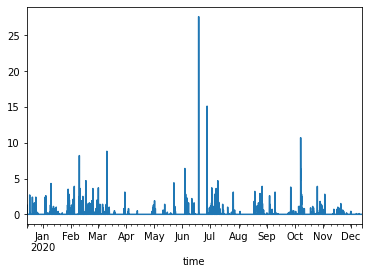

In [8]:
data.prcp.plot();

## Merge station coordinates to trains database

In [37]:
stations = pd.read_csv('../raw_data/Deutsche_Bahn_Haltestellen.csv')
stations.head()

,X,Y,OBJECTID,EVA_NR,DS100,IFOPT,NAME,Verkehr,Laenge,Breite,Betreiber_Name,Betreiber_Nr,Status
0,10.024500,53.534500,1,8002551,AELB,de:02000:11943,Hamburg Elbbrücken,RV,10.024500,53.534500,DB Station und Service AG,NaN,neu
1,8.753100,48.484700,2,8001944,TETN,NaN,Eutingen Nord,RV,8.753100,48.484700,DB Station und Service AG,NaN,neu
2,11.407456,48.790496,3,8003074,MIA,NaN,Ingolstadt Audi,RV,11.407456,48.790496,DB Station und Service AG,NaN,neu
3,9.892910,51.814478,4,8001723,HEBA,NaN,Einbeck Otto-Hahn-Straße,RV,9.892910,51.814478,Ilmebahn GmbH,NaN,neu
4,6.547586,50.782539,5,8004371,KRO,NaN,Nörvenich-Rommelsheim,nur DPN,6.547586,50.782539,Rurtalbahn GmbH,NaN,neu


In [72]:
trains = pd.merge(df, stations[['NAME', 'X', 'Y']], how='left', left_on='bhf', right_on='NAME').drop(columns = 'NAME')
trains

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay,X,Y
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0,7.607805,47.567288
1,EC 6,2019-12-15,Basel SBB,9999,0,1426,0,NaN,NaN
2,EC 6,2019-12-15,Bonn Hbf,1844,0,1845,0,7.097136,50.732008
3,EC 6,2019-12-15,Bremen Hbf,2217,2,2219,2,8.813834,53.083481
4,EC 6,2019-12-15,Duisburg Hbf,1945,6,1946,6,6.775903,51.429785
...,...,...,...,...,...,...,...,...,...
1322923,NJ 421,2022-05-15,Nürnberg Hbf,336,0,435,29,11.082989,49.445616
1322924,NJ 421,2022-05-15,Rosenheim,803,49,805,49,12.119202,47.850018
1322925,NJ 421,2022-05-15,Utrecht Centraal,1958,1,2003,0,NaN,NaN
1322926,NJ 421,2022-05-15,Wörgl Hbf,837,-1,839,-1,NaN,NaN


### Number of stations not found in geolocation

Some of them, I saw in google maps, and these are stations that are conected to DB system but outside Germany in the borders with other countries.

In [73]:
(trains.groupby('bhf').count()['X'] == 0).sum()

35

### Number of stations found in geolocation

In [74]:
(trains.groupby('bhf').count()['X'] != 0).sum()

99

## Get weather information for Munich and Cologne stations only for TEST

### Using meteostat library

Just for testing between Munich and Cologne

In [173]:
# Set time period
start = datetime(2019, 12, 15)
end = datetime(2022, 5, 15, 23, 59)

# Get hourly data
weather = {}
k_m = ['Köln Hbf', 'München Hbf']
for station in k_m:
    lat = trains[trains['bhf'] == station]['Y'].mean()
    lon = trains[trains['bhf'] == station]['X'].mean()
    point = Point(lat, lon)
    data = Hourly(point, start, end)
    data = data.fetch()
    weather[station] = data

In [ ]:
weather['Köln Hbf']

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2019-12-15 00:00:00,5.5,3.3,86.0,0.0,NaN,220.0,8.6,NaN,1001.4,0.0,NaN
2019-12-15 01:00:00,6.3,3.6,83.0,0.0,NaN,120.0,5.0,NaN,999.8,0.0,NaN
2019-12-15 02:00:00,7.3,4.6,83.0,0.0,NaN,140.0,5.8,NaN,998.9,0.0,NaN
2019-12-15 03:00:00,6.5,5.6,94.0,0.6,NaN,150.0,6.8,NaN,997.9,0.0,NaN
2019-12-15 04:00:00,8.7,7.0,89.0,0.2,NaN,110.0,6.5,NaN,996.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-12 19:00:00,6.1,6.1,100.0,0.0,NaN,190.0,3.2,NaN,1003.3,0.0,NaN
2020-12-12 20:00:00,5.9,5.8,99.0,0.0,NaN,180.0,2.5,NaN,1004.0,0.0,NaN
2020-12-12 21:00:00,5.7,5.6,99.0,0.0,NaN,210.0,2.2,NaN,1004.6,0.0,NaN


In [117]:
weather['München Hbf']

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2019-12-15 00:00:00,9.4,4.2,70.0,0.0,0.0,260.0,16.6,34.0,1007.0,0.0,4.0
2019-12-15 01:00:00,8.9,4.5,74.0,0.0,0.0,260.0,11.9,30.0,1007.4,0.0,4.0
2019-12-15 02:00:00,8.2,4.8,79.0,0.1,0.0,180.0,4.7,9.0,1007.3,0.0,8.0
2019-12-15 03:00:00,7.6,4.4,80.0,0.1,0.0,140.0,7.6,17.0,1006.2,0.0,8.0
2019-12-15 04:00:00,6.6,3.0,78.0,0.0,0.0,160.0,8.6,21.0,1006.4,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-12 19:00:00,4.5,2.4,86.0,0.0,0.0,260.0,11.2,21.0,1005.3,0.0,8.0
2020-12-12 20:00:00,4.4,2.4,87.0,0.0,0.0,260.0,11.9,22.0,1005.7,0.0,8.0
2020-12-12 21:00:00,4.5,2.4,86.0,0.0,0.0,260.0,13.0,27.0,1006.3,0.0,8.0


Testing formating to get rows from the date (str or datetime object)

In [90]:
test_date = datetime.strptime('2019-12-15 00:00:00', '%Y-%m-%d %H:%M:%S')
weather['Köln Hbf']['temp'].loc[test_date]

5.5

In [87]:
weather['Köln Hbf']['temp'].loc['2019-12-15 00:00:00']

5.5

Seems like both work

#### Checking categorical information 'coco'

In [109]:
coco = pd.read_csv('../raw_data/weather_coco.csv', sep=';')
coco.set_index('Code', inplace=True)
coco = coco.to_dict()['Weather Condition']
coco

{1: 'Clear',
 2: 'Fair',
 3: 'Cloudy',
 4: 'Overcast',
 5: 'Fog',
 6: 'Freezing Fog',
 7: 'Light Rain',
 8: 'Rain',
 9: 'Heavy Rain',
 10: 'Freezing Rain',
 11: 'Heavy Freezing Rain',
 12: 'Sleet',
 13: 'Heavy Sleet',
 14: 'Light Snowfall',
 15: 'Snowfall',
 16: 'Heavy Snowfall',
 17: 'Rain Shower',
 18: 'Heavy Rain Shower',
 19: 'Sleet Shower',
 20: 'Heavy Sleet Shower',
 21: 'Snow Shower',
 22: 'Heavy Snow Shower',
 23: 'Lightning',
 24: 'Hail',
 25: 'Thunderstorm',
 26: 'Heavy Thunderstorm',
 27: 'Storm'}

It seems that for this particular station, there are no categorical data for the weather

In [97]:
weather[av_stations[1]]['coco'].isnull().sum()

8736

#### Exporting weather database

In [187]:
output_file = '../raw_data/weather.pickle'

In [188]:
with open(output_file, 'wb') as handle:
    pickle.dump(weather, handle, protocol=pickle.HIGHEST_PROTOCOL)   

#### Loading weather database

In [185]:
db_path = '../raw_data/weather.pickle'

In [186]:
with open(db_path, 'rb') as handle:
    weather = pickle.load(handle)

## Some data cleaning

... in a new df from scratch

In [201]:
df0 = pd.read_csv('../raw_data/select_2020.csv', encoding= 'unicode_escape', sep=';')
df1 = pd.read_csv('../raw_data/select_2021.csv', encoding= 'unicode_escape', sep=';')
df2 = pd.read_csv('../raw_data/select_2022.csv', encoding= 'unicode_escape', sep=';')
df = pd.concat([df0, df1, df2], ignore_index=True)
df

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0
1,EC 6,2019-12-15,Basel SBB,9999,0,1426,0
2,EC 6,2019-12-15,Bonn Hbf,1844,0,1845,0
3,EC 6,2019-12-15,Bremen Hbf,2217,2,2219,2
4,EC 6,2019-12-15,Duisburg Hbf,1945,6,1946,6
...,...,...,...,...,...,...,...
1322923,NJ 421,2022-05-15,Nürnberg Hbf,336,0,435,29
1322924,NJ 421,2022-05-15,Rosenheim,803,49,805,49
1322925,NJ 421,2022-05-15,Utrecht Centraal,1958,1,2003,0
1322926,NJ 421,2022-05-15,Wörgl Hbf,837,-1,839,-1


In [202]:
df = df.copy().query("bhf in ('München Hbf', 'Köln Hbf', 'Köln Messe/Deutz Gl.11-12')")

#add feature Köln - München (merged Köln Hbf/ Messe Deutz)
#TODO: Maybe this is not necessary
df['city'] = df.bhf
df['city'] = df['city'].str.replace('Köln Messe/Deutz Gl.11-12','Köln')
df['city'] = df['city'].str.replace('Köln Hbf','Köln')
df['city'] = df['city'].str.replace('München Hbf','München')

#cleaning of train names 
#some letters of 'zugnr' are not capitalized
df['zugnr'] = df['zugnr'].str.upper()

#process of 9999 in arrTime and depTime
df['start_or_endpoint'] = 'nan'
        
df.loc[df['arrTime'] == 9999, 'start_or_endpoint'] = 'start'
df.loc[df['depTime'] == 9999, 'start_or_endpoint'] = 'end'

#overwrite 9999 with respective arr/dep time of same observation (in new clean columns)
df['arrTime_clean'] = np.where(df['arrTime'] == 9999, df['depTime'], df['arrTime'])
df['depTime_clean'] = np.where(df['depTime'] == 9999, df['arrTime'], df['depTime'])

#fill with zeros in front of the hours
df['arrTime_clean'] = df['arrTime_clean'].astype(str)
df['arrTime_clean'] = df['arrTime_clean'].map(lambda a: a.zfill(4))
df['depTime_clean'] = df['depTime_clean'].astype(str)
df['depTime_clean'] = df['depTime_clean'].map(lambda a: a.zfill(4))

In [203]:
df['date'] = df['datum'] + ' ' + df['arrTime_clean'].astype(str)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H%M')
df['sharp_date'] = df['date'].dt.round('H')
df

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay,city,start_or_endpoint,arrTime_clean,depTime_clean,date
15,EC 6,2019-12-15,Köln Hbf,1906,0,1908,0,Köln,nan,1906,1908,2019-12-15 19:06:00
36,EC 6,2019-12-16,Köln Hbf,1906,10,1909,8,Köln,nan,1906,1909,2019-12-16 19:06:00
56,EC 6,2019-12-17,Köln Hbf,1906,47,1909,47,Köln,nan,1906,1909,2019-12-17 19:06:00
79,EC 6,2019-12-18,Köln Hbf,1906,-1,1909,-1,Köln,nan,1906,1909,2019-12-18 19:06:00
80,EC 6,2019-12-18,Köln Messe/Deutz Gl.11-12,1906,29,1909,30,Köln,nan,1906,1909,2019-12-18 19:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1322884,NJ 421,2022-05-13,München Hbf,711,0,728,5,München,nan,0711,0728,2022-05-13 07:11:00
1322900,NJ 421,2022-05-14,Köln Hbf,2212,2,2216,1,Köln,nan,2212,2216,2022-05-14 22:12:00
1322903,NJ 421,2022-05-14,München Hbf,711,0,728,0,München,nan,0711,0728,2022-05-14 07:11:00
1322919,NJ 421,2022-05-15,Köln Hbf,2212,2,2216,1,Köln,nan,2212,2216,2022-05-15 22:12:00


In [215]:
total_df =  pd.DataFrame()
for station, w_df in weather.items():
    station_df = pd.merge(df[df['city'] == station], weather[station], how='left', left_on='sharp_date', right_index=True)
    total_df = pd.concat([total_df, station_df])

In [216]:
total_df

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay,city,start_or_endpoint,arrTime_clean,...,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
15,EC 6,2019-12-15,Köln Hbf,1906,0,1908,0,Köln,nan,1906,...,2.0,71.0,0.0,NaN,190.0,13.3,21.0,1008.2,0.0,4.0
36,EC 6,2019-12-16,Köln Hbf,1906,10,1909,8,Köln,nan,1906,...,7.9,95.0,0.0,NaN,120.0,11.5,18.0,1004.9,0.0,4.0
56,EC 6,2019-12-17,Köln Hbf,1906,47,1909,47,Köln,nan,1906,...,7.4,61.0,0.0,NaN,170.0,18.4,30.0,1003.9,0.0,4.0
79,EC 6,2019-12-18,Köln Hbf,1906,-1,1909,-1,Köln,nan,1906,...,4.6,82.0,0.0,NaN,120.0,17.3,28.0,1017.1,0.0,2.0
80,EC 6,2019-12-18,Köln Messe/Deutz Gl.11-12,1906,29,1909,30,Köln,nan,1906,...,4.6,82.0,0.0,NaN,120.0,17.3,28.0,1017.1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322847,NJ 421,2022-05-11,München Hbf,711,0,728,0,München,nan,0711,...,9.1,50.0,0.0,0.0,220.0,9.4,18.0,1017.7,60.0,4.0
1322865,NJ 421,2022-05-12,München Hbf,711,21,728,9,München,nan,0711,...,9.0,45.0,0.0,0.0,250.0,15.5,32.0,1018.1,33.0,4.0
1322884,NJ 421,2022-05-13,München Hbf,711,0,728,5,München,nan,0711,...,13.8,88.0,0.7,0.0,240.0,5.8,12.0,1020.2,4.0,8.0
1322903,NJ 421,2022-05-14,München Hbf,711,0,728,0,München,nan,0711,...,11.2,76.0,0.0,0.0,290.0,2.2,5.0,1021.7,10.0,4.0


In [217]:
total_df.to_csv('../raw_data/KM_test.csv')

## Get weather information for every station geolocated

In [ ]:
av_stations = list(trains[~trains['X'].isnull()].groupby('bhf').indices.keys())

In [ ]:
av_stations

['Andernach',
 'Aschaffenburg Hbf',
 'Augsburg Hbf',
 'Aulendorf',
 'Bad Hersfeld',
 'Baden-Baden',
 'Bamberg',
 'Basel Bad Bf',
 'Bergen auf Rügen',
 'Berlin Gesundbrunnen',
 'Berlin Hbf (tief)',
 'Berlin Südkreuz',
 'Berlin-Spandau',
 'Biberach(Riß)',
 'Bingen(Rhein) Hbf',
 'Bitterfeld',
 'Bochum Hbf',
 'Bonn Hbf',
 'Bremen Hbf',
 'Bruchsal',
 'Bützow',
 'Celle',
 'Dortmund Hbf',
 'Dresden Hbf',
 'Dresden-Neustadt',
 'Duisburg Hbf',
 'Düsseldorf Hbf',
 'Eisenach',
 'Erfurt Hbf',
 'Essen Hbf',
 'Frankfurt(M) Flughafen Fernbf',
 'Frankfurt(Main)Hbf',
 'Frankfurt(Main)Süd',
 'Freiburg(Breisgau) Hbf',
 'Friedrichshafen Stadt',
 'Fulda',
 'Gelsenkirchen Hbf',
 'Gotha',
 'Göppingen',
 'Göttingen',
 'Günzburg',
 'Hagen Hbf',
 'Halle(Saale)Hbf',
 'Hamburg Dammtor',
 'Hamburg Hbf',
 'Hamburg-Altona',
 'Hamburg-Harburg',
 'Hannover Hbf',
 'Heidelberg Hbf',
 'Ingolstadt Hbf',
 'Karlsruhe Hbf',
 'Kassel-Wilhelmshöhe',
 'Kiel Hbf',
 'Koblenz Hbf',
 'Köln Hbf',
 'Köln Messe/Deutz Gl.11-12',
 'Köln

In [239]:
# Set time period
start = datetime(2019, 12, 15)
end = datetime(2022, 5, 15, 23, 59)

# Get hourly data
weather = {}
station_list = []
for station in av_stations:
    lat = trains[trains['bhf'] == station]['Y'].mean()
    lon = trains[trains['bhf'] == station]['X'].mean()
    point = Point(lat, lon)
    try:
        data = Hourly(point, start, end)
        data = data.fetch()
        weather[station] = data
        data.to_csv('../raw_data/sw/sw_' + station + '.csv') #sw: single weather
        station_list.append(station)
    except:
        continue

output_file = '../raw_data/weather.pickle'
with open(output_file, 'wb') as handle:
    pickle.dump(weather, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [242]:
len(weather.keys())

98

In [238]:
for st in av_stations:
    if st not in station_list:
        print(st)

Eisenach


In [240]:
len(station_list)

95

In [243]:
for st in weather.keys():
    if st not in station_list:
        print(st)

Köln Messe/Deutz Gl.11-12
Köln/Bonn Flughafen
Siegburg/Bonn
